# Training

### Start execution

In [1]:
import time

In [2]:
start = time.time()

# 1. Setting the environment

In [3]:
!pip install -q resampy

# 2. Import Libraries

In [4]:
import os
import resampy
import librosa
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn import metrics

In [6]:
import warnings
warnings.filterwarnings("ignore")

# 3. Preparation

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path_general = 'drive/MyDrive/Profesional_Academico/Github_Personal/ML_AI_Contents/09.Deep_Learning/73.Audio_NN_Scratch/processed'

# 4. Build datasets

### a. Train

In [9]:
X_train = []
y_train = []

for i in range(1, 10 + 1):

  path_part = f'{path_general}/train/{i}'

  part_files = os.listdir(path_part)

  for p_f in part_files:

    path_elem = f'{path_part}/{p_f}'

    elem_part = np.load(path_elem)

    X_train.append(elem_part)
    y_train.append(i)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
y_train_1 = (y_train == 1)*1
y_train_2 = (y_train == 2)*1
y_train_3 = (y_train == 3)*1
y_train_4 = (y_train == 4)*1
y_train_5 = (y_train == 5)*1
y_train_6 = (y_train == 6)*1
y_train_7 = (y_train == 7)*1
y_train_8 = (y_train == 8)*1
y_train_9 = (y_train == 9)*1
y_train_10 = (y_train == 10)*1

In [12]:
y_train = np.array([y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8, y_train_9, y_train_10])

In [13]:
y_train = y_train.transpose()

In [14]:
X_train.shape

(5239, 40, 174, 1)

In [15]:
y_train.shape

(5239, 10)

### b. Val

In [16]:
X_val = []
y_val = []

for i in range(1, 10 + 1):

  path_part = f'{path_general}/val/{i}'

  part_files = os.listdir(path_part)

  for p_f in part_files:

    path_elem = f'{path_part}/{p_f}'

    elem_part = np.load(path_elem)

    X_val.append(elem_part)
    y_val.append(i)

In [17]:
X_val = np.array(X_val)
y_val = np.array(y_val)

In [18]:
y_val_1 = (y_val == 1)*1
y_val_2 = (y_val == 2)*1
y_val_3 = (y_val == 3)*1
y_val_4 = (y_val == 4)*1
y_val_5 = (y_val == 5)*1
y_val_6 = (y_val == 6)*1
y_val_7 = (y_val == 7)*1
y_val_8 = (y_val == 8)*1
y_val_9 = (y_val == 9)*1
y_val_10 = (y_val == 10)*1

In [19]:
y_val = np.array([y_val_1, y_val_2, y_val_3, y_val_4, y_val_5, y_val_6, y_val_7, y_val_8, y_val_9, y_val_10])

In [20]:
y_val = y_val.transpose()

In [21]:
X_val.shape

(1746, 40, 174, 1)

In [22]:
y_val.shape

(1746, 10)

### c. Test

In [23]:
X_test = []
y_test = []

for i in range(1, 10 + 1):

  path_part = f'{path_general}/test/{i}'

  part_files = os.listdir(path_part)

  for p_f in part_files:

    path_elem = f'{path_part}/{p_f}'

    elem_part = np.load(path_elem)

    X_test.append(elem_part)
    y_test.append(i)

In [24]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [25]:
y_test_1 = (y_test == 1)*1
y_test_2 = (y_test == 2)*1
y_test_3 = (y_test == 3)*1
y_test_4 = (y_test == 4)*1
y_test_5 = (y_test == 5)*1
y_test_6 = (y_test == 6)*1
y_test_7 = (y_test == 7)*1
y_test_8 = (y_test == 8)*1
y_test_9 = (y_test == 9)*1
y_test_10 = (y_test == 10)*1

In [26]:
y_test = np.array([y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6, y_test_7, y_test_8, y_test_9, y_test_10])

In [27]:
y_test = y_test.transpose()

In [28]:
X_test.shape

(1747, 40, 174, 1)

In [29]:
y_test.shape

(1747, 10)

# 5. Create model

In [30]:
num_rows = 40
num_columns = 174
num_channels = 1
num_labels = 10
filter_size = 2

# Construct model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

In [31]:
lr = 0.0001

In [32]:
model.compile(optimizer = Adam(learning_rate = lr), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train

In [33]:
n_epochs = 1000

In [34]:
hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 50, epochs = n_epochs, verbose = 1)

Epoch 1/1000
105/105 [==============================] - 5s 12ms/step - loss: 5.5650 - accuracy: 0.1433 - val_loss: 2.4641 - val_accuracy: 0.1592
Epoch 2/1000
105/105 [==============================] - 1s 6ms/step - loss: 3.0641 - accuracy: 0.2140 - val_loss: 2.1489 - val_accuracy: 0.2325
Epoch 3/1000
105/105 [==============================] - 1s 5ms/step - loss: 2.4322 - accuracy: 0.2787 - val_loss: 1.9969 - val_accuracy: 0.2795
Epoch 4/1000
105/105 [==============================] - 1s 6ms/step - loss: 2.0680 - accuracy: 0.3304 - val_loss: 1.8727 - val_accuracy: 0.3333
Epoch 5/1000
105/105 [==============================] - 1s 5ms/step - loss: 1.8688 - accuracy: 0.3730 - val_loss: 1.8010 - val_accuracy: 0.3809
Epoch 6/1000
105/105 [==============================] - 1s 6ms/step - loss: 1.7561 - accuracy: 0.3923 - val_loss: 1.7827 - val_accuracy: 0.3814
Epoch 7/1000
105/105 [==============================] - 1s 6ms/step - loss: 1.6740 - accuracy: 0.4213 - val_loss: 1.7329 - val_accuracy

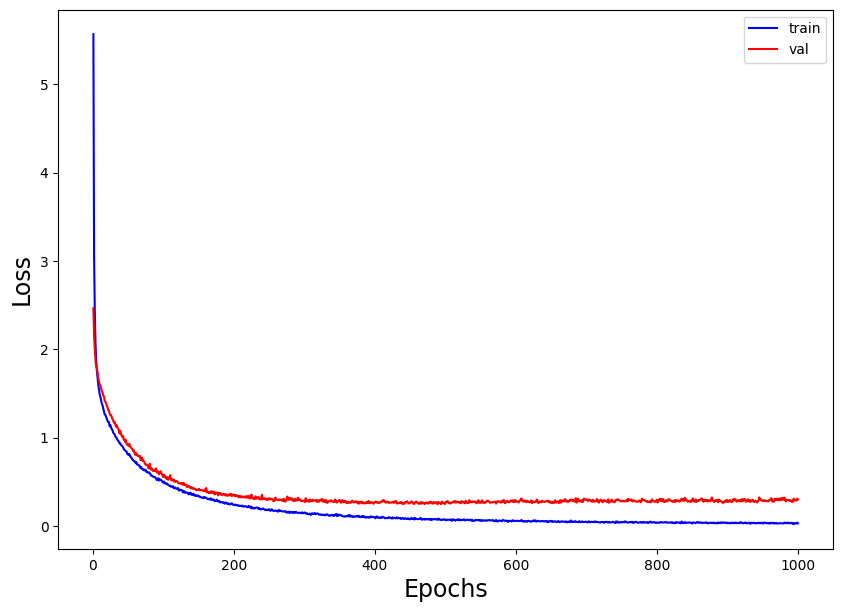

In [35]:
plt.figure(figsize = (10, 7))

plt.plot([i for i in range(1, n_epochs + 1)], hist.history['loss'], color = 'blue', label = 'train')
plt.plot([i for i in range(1, n_epochs + 1)], hist.history['val_loss'], color = 'red', label = 'val')

plt.xlabel('Epochs', fontsize = 17)
plt.ylabel('Loss', fontsize = 17)

plt.legend()
plt.show()

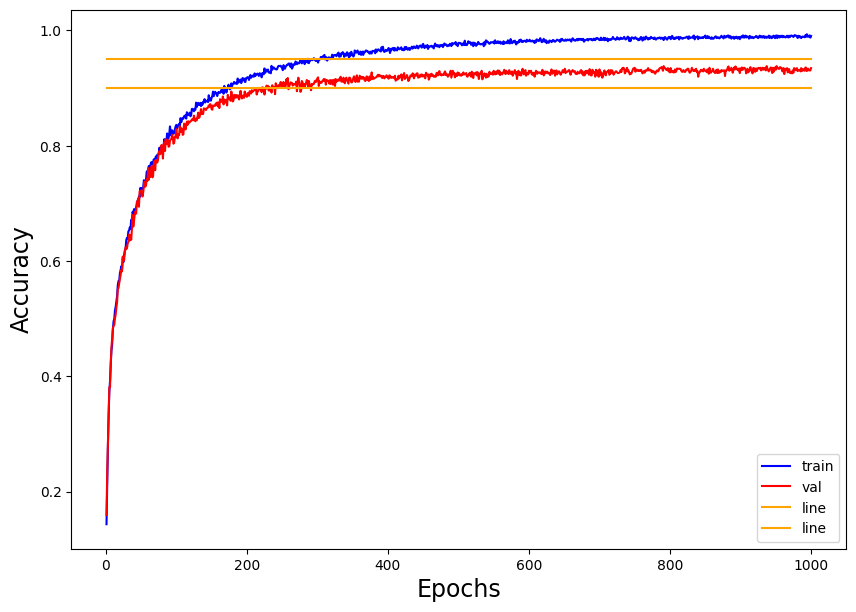

In [36]:
plt.figure(figsize = (10, 7))

plt.plot([i for i in range(1, n_epochs + 1)], hist.history['accuracy'], color = 'blue', label = 'train')
plt.plot([i for i in range(1, n_epochs + 1)], hist.history['val_accuracy'], color = 'red', label = 'val')
plt.plot([i for i in range(1, n_epochs + 1)], [0.9 for i in range(1, n_epochs + 1)], color = 'orange', label = 'line')
plt.plot([i for i in range(1, n_epochs + 1)], [0.95 for i in range(1, n_epochs + 1)], color = 'orange', label = 'line')

plt.xlabel('Epochs', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)

plt.legend()
plt.show()

# 7. Save the model

In [37]:
model.save_weights('drive/MyDrive/Profesional_Academico/Github_Personal/ML_AI_Contents/09.Deep_Learning/73.Audio_NN_Scratch/model/model.weights.h5')

### End of execution

In [38]:
end = time.time()

delta = (end - start)

hours = int(delta/3_600)
mins = int((delta - hours*3_600)/60)
secs = int(delta - hours*3_600 - mins*60)

print(f'Hours: {hours}, Minutes: {mins}, Seconds: {secs}')

Hours: 0, Minutes: 10, Seconds: 36
